In [10]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
data=pd.read_csv("car-mpg.csv")
data

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [13]:
data.shape

(398, 10)

In [14]:
data.describe()

,mpg,cyl,disp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [15]:
data = pd.get_dummies(data, columns=['origin'])
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,car_name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,0,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,ford torino,1,0,0


In [16]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,car_name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,0,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,ford torino,1,0,0


In [17]:
temp=pd.DataFrame(data.hp.str.isdigit()) 
temp[temp['hp']==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [18]:
data.hp[~data.hp.str.isdigit()]

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object

In [19]:
data = data.replace('?', np.nan)
data[data.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,car_name,origin_1,origin_2,origin_3
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,ford maverick,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,renault lecar deluxe,0,1,0
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,renault 18i,0,1,0
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl,1,0,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   car_type  398 non-null    int64  
 8   car_name  398 non-null    object 
 9   origin_1  398 non-null    uint8  
 10  origin_2  398 non-null    uint8  
 11  origin_3  398 non-null    uint8  
dtypes: float64(3), int64(4), object(2), uint8(3)
memory usage: 29.3+ KB


In [21]:
data['hp'].median() 

93.5

In [22]:
data=data.drop('car_name',axis=1)

In [23]:
data= data.apply(lambda x: x.fillna(x.median()),axis=0)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   car_type  398 non-null    int64  
 8   origin_1  398 non-null    uint8  
 9   origin_2  398 non-null    uint8  
 10  origin_3  398 non-null    uint8  
dtypes: float64(3), int64(4), object(1), uint8(3)
memory usage: 26.2+ KB


In [25]:
data.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
car_type      int64
origin_1      uint8
origin_2      uint8
origin_3      uint8
dtype: object

In [26]:
data['hp'] = data['hp'].astype('float64')

In [27]:
data.describe()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_1,origin_2,origin_3
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.530151,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.499718,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
data.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
car_type      int64
origin_1      uint8
origin_2      uint8
origin_3      uint8
dtype: object

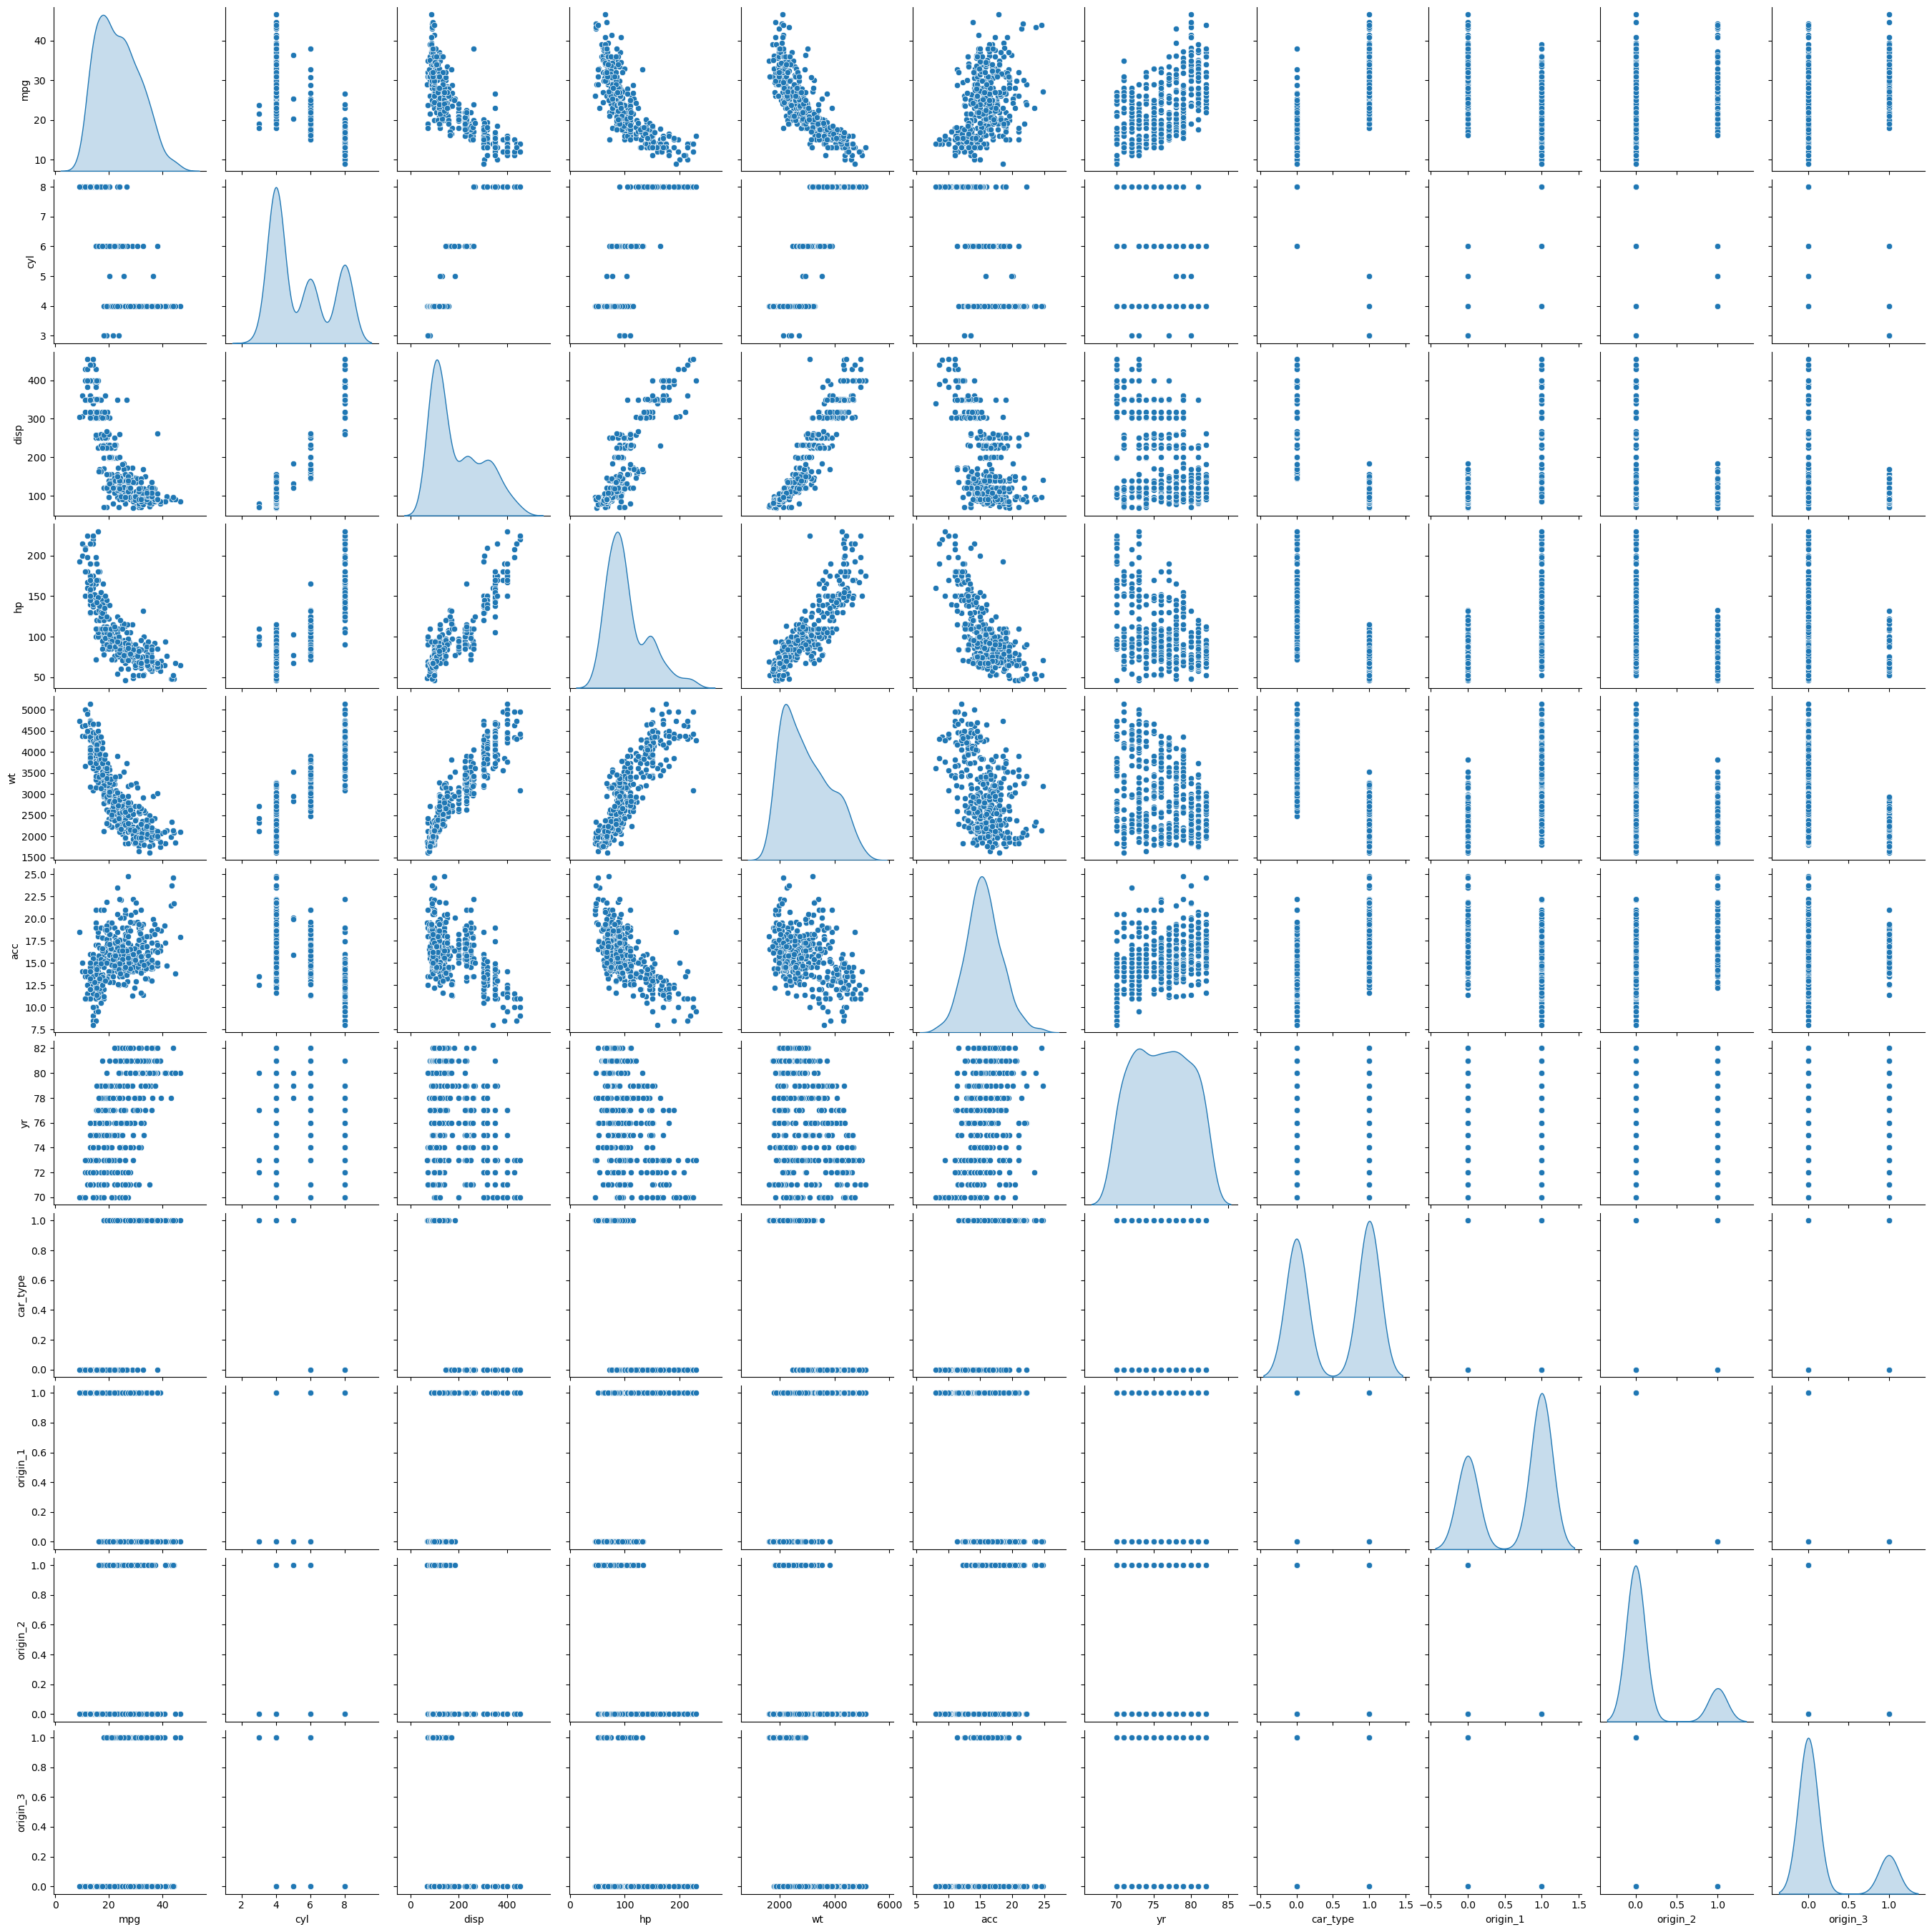

In [39]:
sns.pairplot(data, diag_kind='kde')

In [29]:
X = data.drop('mpg', axis=1)
y = data[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [30]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

LinearRegression()

In [31]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.4750732919168041
The coefficient for disp is 0.024349322002431596
The coefficient for hp is -0.04686191039325272
The coefficient for wt is -0.006564163296278448
The coefficient for acc is 0.04170227918810266
The coefficient for yr is 0.7938975478842019
The coefficient for car_type is 5.966597439861027
The coefficient for origin_1 is -1.4243481095472275
The coefficient for origin_2 is 0.7722361845873513
The coefficient for origin_3 is 0.6521119249598702


In [32]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -28.235395568497555


In [33]:
regression_model.score(X_train, y_train)

0.8343770256960538

In [34]:
regression_model.score(X_test, y_test)

0.8513421387780061

In [35]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_1,origin_2,origin_3,mpg
350,4,105.0,63.0,2215,14.9,81,1,1,0,0,34.7
59,4,97.0,54.0,2254,23.5,72,1,0,1,0,23.0
120,4,121.0,112.0,2868,15.5,73,1,0,1,0,19.0
12,8,400.0,150.0,3761,9.5,70,0,1,0,0,15.0
349,4,91.0,68.0,1985,16.0,81,1,0,0,1,34.1


In [36]:
lm1 = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type', data = data_train).fit()
print(lm1.params)

Intercept   -26.693360
cyl           1.863718
disp          0.010066
hp           -0.039229
wt           -0.006415
acc           0.011724
yr            0.758818
car_type      6.626521
dtype: float64


In [37]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     182.9
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.41e-98
Time:                        14:58:13   Log-Likelihood:                -725.17
No. Observations:                 278   AIC:                             1466.
Df Residuals:                     270   BIC:                             1495.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6934      5.597     -4.769      0.0

In [38]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [39]:
math.sqrt(mse)

2.9481469604410395

In [40]:
print(regression_model.score(X_test, y_test))
y_pred = regression_model.predict(X_test)

0.8513421387780061


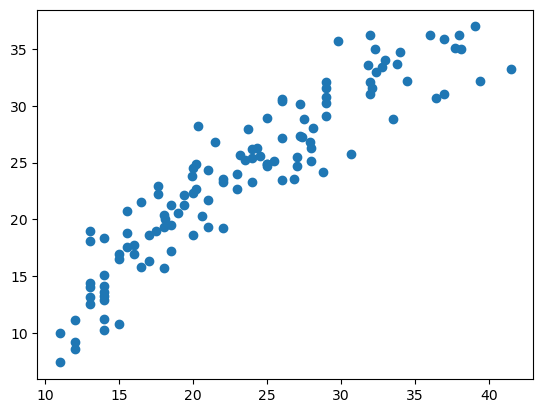

In [41]:
plt.scatter(y_test['mpg'], y_pred)

In [42]:
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


In [43]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [44]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.31322114345681973
The coefficient for disp is 0.31584765409700905
The coefficient for hp is -0.22344107620802994
The coefficient for wt is -0.7041536673603049
The coefficient for acc is 0.01469232834699713
The coefficient for yr is 0.37206773984027763
The coefficient for car_type is 0.37796664250331546
The coefficient for origin_1 is -0.07379471579723902
The coefficient for origin_2 is 0.04770328365279057
The coefficient for origin_3 is 0.04420166441569555


In [45]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3.0985878069368606e-17


In [64]:
regression_model.score(X_test_scaled, y_test_scaled)

0.8582849620961843

In [46]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

C:\Users\admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [47]:
math.sqrt(mse)

0.3764505783018744

In [48]:
y_pred = regression_model.predict(X_test_scaled)

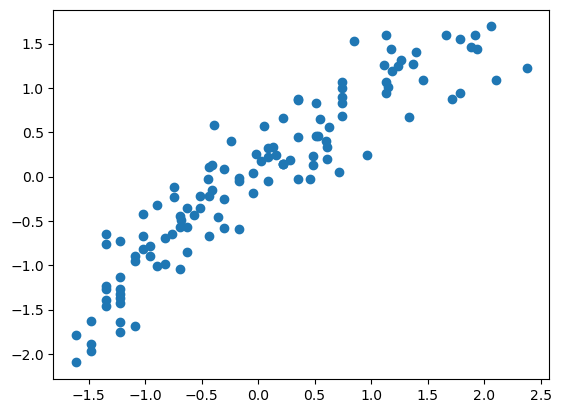

In [49]:
plt.scatter(y_test_scaled['mpg'], y_pred)

In [50]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [61]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,":",  vif[i])
        i = i+1

mpg : 17.89743609280417
disp : 23.07598647406674
hp : 9.980247199288577
wt : 10.98384868144468
acc : 2.5542513506599884
yr : 1.3023362570960022
car_type : 7.087438904687801
origin_1 : 523.1517829109134
origin_2 : 145.3216623387118
origin_3 : 167.43653106986787


In [52]:
X = data.drop('cyl', axis=1)
y = data[['cyl']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [53]:
regression_model1 = LinearRegression()

regression_model1.fit(X_train, y_train)

LinearRegression()

In [56]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[0][idx]))

The coefficient for mpg is 0.02001796258319281
The coefficient for disp is 0.00993698392307652
The coefficient for hp is 0.006452964157023247
The coefficient for wt is -3.889035943213057e-05
The coefficient for acc is 0.011608798686427278
The coefficient for yr is -0.009233648566200509
The coefficient for car_type is -1.3562918503503893
The coefficient for origin_1 is -0.11678904397061338
The coefficient for origin_2 is 0.07436610650264887
The coefficient for origin_3 is 0.042422937467963946


In [57]:
intercept = regression_model1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.7798995082319817


In [58]:
regression_model1.score(X_train, y_train)

0.950151521055478

In [59]:
regression_model1.score(X_test, y_test)

0.9296397327118417